In [4]:
import numpy as np
import pandas as pd

loading dataset


In [7]:
df = pd.read_csv("/content/MLE_PROG/DATASET/books.csv");
print(df);



                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
345  Wild: From Lost to Found on the Pacific Crest ...   
346  Winter of the World: Book Two of the Century T...   
347  Women Food and God: An Unexpected Path to Almo...   
348                                             Wonder   
349       Wrecking Ball (Diary of a Wimpy Kid Book 14)   

                       author  rating  year        genre  
0                    JJ Smith     4.7  2016  Non Fiction  
1                Stephen King     4.6  2011      Fiction  
2          Jordan B. Peterson     4.7  2018  Non Fiction  
3               George Orwell     4.7  2017      Fiction  
4    Nat

In [8]:
df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [9]:
filtered_rating = df[df['rating'] >= 4.5]
print(filtered_rating)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
343                          Where the Wild Things Are   
344  Whose Boat Is This Boat?: Comments That Don't ...   
346  Winter of the World: Book Two of the Century T...   
348                                             Wonder   
349       Wrecking Ball (Diary of a Wimpy Kid Book 14)   

                               author  rating  year        genre  
0                            JJ Smith     4.7  2016  Non Fiction  
1                        Stephen King     4.6  2011      Fiction  
2                  Jordan B. Peterson     4.7  2018  Non Fiction  
3                       George Orwe

In [10]:
author_counts = df['author'].value_counts()

print(author_counts)

Jeff Kinney            12
Rick Riordan           10
Stephenie Meyer         7
Bill O'Reilly           6
J.K. Rowling            6
                       ..
Eric Larson             1
Christopher Paolini     1
Jennifer Smith          1
Sarah Young             1
R. J. Palacio           1
Name: author, Length: 247, dtype: int64


In [11]:
max_author = author_counts.idxmax()
print(max_author)

Jeff Kinney


In [12]:
author_books = df[df['author'] == 'Jeff Kinney']
print(author_books)

                                                  name       author  rating  \
37          Cabin Fever (Diary of a Wimpy Kid, Book 6)  Jeff Kinney     4.8   
57             Diary of a Wimpy Kid: Hard Luck, Book 8  Jeff Kinney     4.8   
58       Diary of a Wimpy Kid: The Last Straw (Book 3)  Jeff Kinney     4.8   
59                 Diary of a Wimpy Kid: The Long Haul  Jeff Kinney     4.8   
65   Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...  Jeff Kinney     4.8   
72              Double Down (Diary of a Wimpy Kid #11)  Jeff Kinney     4.8   
179              Old School (Diary of a Wimpy Kid #10)  Jeff Kinney     4.8   
244                                        The Getaway  Jeff Kinney     4.8   
278        The Meltdown (Diary of a Wimpy Kid Book 13)  Jeff Kinney     4.8   
302     The Third Wheel (Diary of a Wimpy Kid, Book 7)  Jeff Kinney     4.7   
308      The Ugly Truth (Diary of a Wimpy Kid, Book 5)  Jeff Kinney     4.8   
349       Wrecking Ball (Diary of a Wimpy Kid Book 1

In [13]:
author_avg_ratings = df.groupby('author')['rating'].mean()
print(author_avg_ratings)

author
Abraham Verghese              4.60
Adam Gasiewski                4.40
Adam Mansbach                 4.80
Adir Levy                     4.80
Admiral William H. McRaven    4.70
                              ... 
Walter Isaacson               4.55
William Davis                 4.40
William P. Young              4.60
Wizards RPG Team              4.80
Zhi Gang Sha                  4.60
Name: rating, Length: 247, dtype: float64


In [14]:
max_avg_author = author_avg_ratings.idxmax()
max_avg_rating = author_avg_ratings.max()
print(f"{max_avg_author}: {max_avg_rating}")

Alice Schertle: 4.9


In [15]:
import matplotlib.pyplot as plt

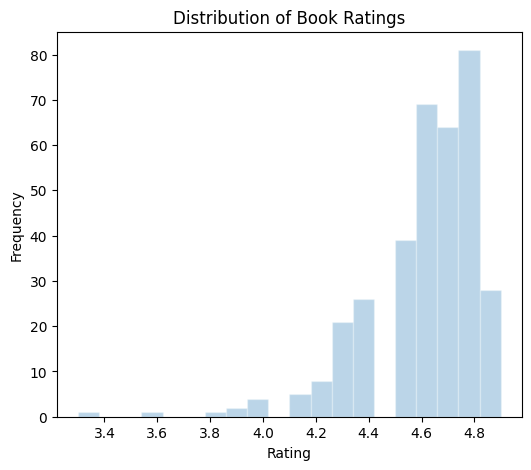

In [16]:
plt.figure(figsize=(6, 5))
plt.hist(df['rating'], bins=20, edgecolor='white', alpha=0.3)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
df.isnull().sum()

name      0
author    0
rating    0
year      0
genre     0
dtype: int64

In [18]:
df.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [20]:
num_cols = df.select_dtypes(include=['number'])
correlation_matrix = num_cols.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
           rating      year
rating  1.000000  0.220153
year    0.220153  1.000000


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('rating', axis=1)
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

,name,author,year,genre
228,The Book Thief,Markus Zusak,2013,Fiction
78,Eclipse (Twilight Sagas),Stephenie Meyer,2009,Fiction
90,First 100 Words,Roger Priddy,2014,Non Fiction
16,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,2015,Non Fiction
66,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,2018,Childrens
...,...,...,...,...
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,2018,Childrens
106,Good to Great: Why Some Companies Make the Lea...,Jim Collins,2009,Non Fiction
270,The Litigators,John Grisham,2011,Fiction
348,Wonder,R. J. Palacio,2013,Fiction


In [23]:
X_test

,name,author,year,genre
157,Life,Keith Richards,2010,Non Fiction
341,When Breath Becomes Air,Paul Kalanithi,2016,Non Fiction
315,"Things That Matter: Three Decades of Passions,...",Charles Krauthammer,2013,Non Fiction
234,The Confession: A Novel,John Grisham,2010,Fiction
155,Lettering and Modern Calligraphy: A Beginner's...,Paper Peony Press,2018,Non Fiction
...,...,...,...,...
94,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,2011,Fiction
181,One Thousand Gifts: A Dare to Live Fully Right...,Ann Voskamp,2011,Non Fiction
179,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,2015,Childrens
199,Sarah's Key,Tatiana de Rosnay,2010,Fiction


In [24]:
y_train

228    4.6
78     4.7
90     4.7
16     4.4
66     4.9
      ... 
71     4.9
106    4.5
270    4.4
348    4.8
102    4.8
Name: rating, Length: 280, dtype: float64

In [25]:
y_test

157    4.5
341    4.8
315    4.7
234    4.3
155    4.4
      ... 
94     4.6
181    4.6
179    4.8
199    4.6
326    4.7
Name: rating, Length: 70, dtype: float64